# Mini_Project 2
## Taks 0

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from scipy import stats

import seaborn as sns
# %matplotlib notebook
sns.set_style('whitegrid')

In [2]:
baseline_csv = pd.read_csv("498DS_BaselineData.csv")
metformin_csv = pd.read_csv("498DS_MetforminData.csv")

In [3]:

print(len(baseline_csv.columns))
print(len(metformin_csv.columns))
#     Baseline cells: s_85_M2_N704_S502_RPKM, s_85_M2_N704_S504_RPKM and s_85_M2_N711_S507_RPKM
# ·         Metformin cells: s_204_M2_N704_S503_RPKM, s_204_M2_N711_S502_RPKM and s_63_M2_N702_S502_RPKM
# ·         Gene: TXNRD1

174
182


In [4]:
metformin_csv[metformin_csv['GeneID'] == 'TXNRD1']
baseline_csv[baseline_csv['GeneID'] == 'TXNRD1']


,Chr,GeneID,StartCoding,Stop,CodingLength,s_62_M2_N701_S502_RPKM,s_62_M2_N701_S503_RPKM,s_62_M2_N701_S504_RPKM,s_62_M2_N701_S505_RPKM,s_62_M2_N701_S506_RPKM,...,s_85_M2_N711_S501_RPKM,s_85_M2_N711_S502_RPKM,s_85_M2_N711_S503_RPKM,s_85_M2_N711_S504_RPKM,s_85_M2_N711_S506_RPKM,s_85_M2_N711_S507_RPKM,s_85_M2_N711_S508_RPKM,s_85_M2_N712_S503_RPKM,s_85_M2_N712_S504_RPKM,s_85_M2_N712_S505_RPKM
754,chr12,TXNRD1,104609559,104744062,4233,160.147832,0.0,129.160314,126.879342,57.828562,...,97.496592,0.0,168.027198,57.838335,113.881628,54.60663,160.100423,82.398247,97.580781,61.414455


### Task 1.1 Import both datasets into Pandas.
        How many gene samples are present in each dataset?
        How many cells are present in each dataset?
        How many genes are common in both datasets?


In [5]:
print("In base cell dataset, there are", len(baseline_csv), "gene samples in datatset")
print("In metformin dateset, there are",len(metformin_csv), "gene samples in datatset")

In base cell dataset, there are 1170 gene samples in datatset
In metformin dateset, there are 1170 gene samples in datatset


In [6]:
baseline = baseline_csv.drop(['Chr','GeneID','StartCoding','Stop','CodingLength'], axis=1)
metformin= metformin_csv.drop(['Chr','GeneID','Stop','Start','CodingLength'], axis=1)
print("In base cell, there are", len(baseline.columns), " cells in datatset")
print("In metformin cell, there are",len(metformin.columns), "cells in datatset")

In base cell, there are 169  cells in datatset
In metformin cell, there are 177 cells in datatset


In [7]:
met_list = list(metformin_csv['GeneID'])
base_list = list(baseline_csv['GeneID'])
common = list(set(met_list).intersection(base_list))
print("There are",len(common),"genes are common in both datasets")

There are 833 genes are common in both datasets


### Task 1.2 Plot the variation of gene expression across different genes for your assigned cells. You will have two plots - One for baseline cells and another for Metformin cells.

   

In [8]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
s502 = baseline_csv['s_85_M2_N704_S502_RPKM']
s502 = s502[(32 < s502) & (s502 < 2000)]
s502 = np.log(s502)
s504 = baseline_csv['s_85_M2_N704_S504_RPKM']
s504 = s504[(32 < s504) & (s504 < 2000)]
s504 = np.log(s504)
s507 = baseline_csv['s_85_M2_N711_S507_RPKM']
s507 = s507[(32 < s507) & (s507 < 2000)]
s507 = np.log(s507)

s704 = metformin_csv['s_204_M2_N704_S503_RPKM']
s704 = s704[(32 < s704) & (s704 < 2000)]
s704 = np.log(s704)
s711 = metformin_csv['s_204_M2_N711_S502_RPKM']
s711 = s711[(32 < s711) & (s711 < 2000)]
s711 = np.log(s711)
s702 = metformin_csv['s_63_M2_N702_S502_RPKM']
s702 = s702[(32 < s702) & (s702 < 2000)]
s702 = np.log(s702)


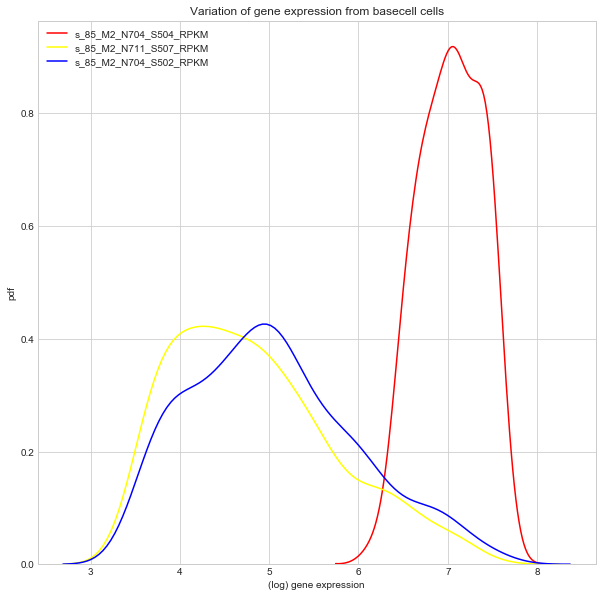

In [10]:

f, ax = plt.subplots(figsize=(10, 10))
sns.distplot(s504, ax=ax,color="red",label = "s_85_M2_N704_S504_RPKM",hist=False);
sns.distplot(s507, ax=ax,color="yellow",label = "s_85_M2_N711_S507_RPKM",hist=False);
sns.distplot(s502, ax=ax,color="blue",label = "s_85_M2_N704_S502_RPKM",hist=False);
ax.legend()
ax.set_title('Variation of gene expression from basecell cells')
ax.set_ylabel('pdf')
ax.set_xlabel('(log) gene expression')
plt.show()



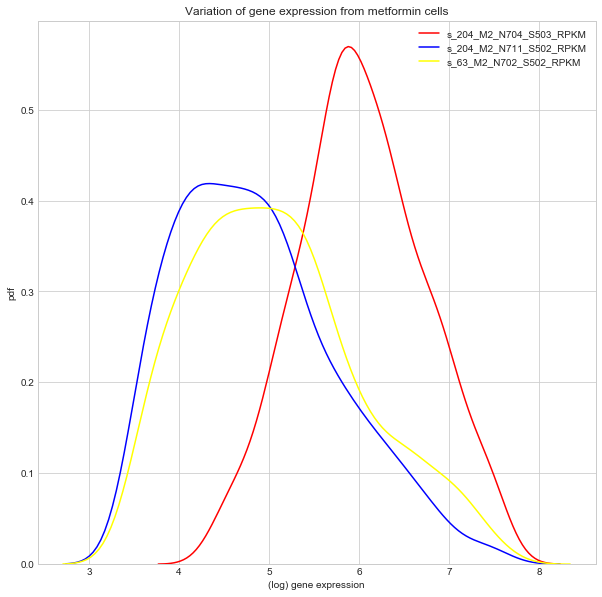

In [11]:
from numpy import linalg as LA
f, ax = plt.subplots(figsize=(10,10))

sns.distplot(s704, ax=ax,color="red",label = "s_204_M2_N704_S503_RPKM",hist=False);
sns.distplot(s711, ax=ax,color="blue",label = "s_204_M2_N711_S502_RPKM",hist=False);
sns.distplot(s702, ax=ax,color="yellow",label = "s_63_M2_N702_S502_RPKM",hist=False);
ax.legend()
ax.set_title('Variation of gene expression from metformin cells')
ax.set_ylabel('pdf')
ax.set_xlabel('(log) gene expression')
plt.show()


### Task 1.3 Plot the variation of gene expression across different cells for your assigned gene.


In [12]:
bGene = baseline_csv[baseline_csv['GeneID'] == 'TXNRD1']
bGene = bGene.drop(['Chr','GeneID','StartCoding','Stop','CodingLength'], axis=1)
mGene = metformin_csv[metformin_csv['GeneID'] == 'TXNRD1']
mGene = mGene.drop(['Chr','GeneID','Stop','Start','CodingLength'], axis=1)


In [13]:
bGene=  bGene[(32 < bGene) & (bGene < 2000)]
b = (bGene.values.tolist())[0]
b = [x for x in b if str(x) != 'nan']
b = np.log(b)
mGene=  mGene[(32 < mGene) & (mGene < 2000)]
m = ((mGene.values).tolist())[0]
m = [x for x in m if str(x) != 'nan']
m = np.log(m)

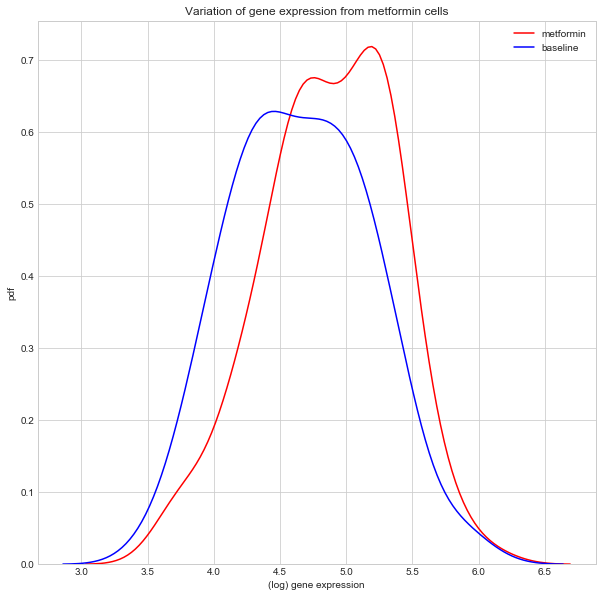

In [14]:

f, ax = plt.subplots(figsize=(10, 10))

sns.distplot(m, ax=ax,color="red",label = "metformin",hist=False);
sns.distplot(b, ax=ax,color="blue",label = "baseline",hist=False);
ax.legend()
ax.set_title('Variation of gene expression from metformin cells')
ax.set_ylabel('pdf')
ax.set_xlabel('(log) gene expression')
plt.show()


### Task 1.4 Perform the KS test on your Baseline and Metformin Variance distributions.
    How many genes are differentially expressed at α=0.10,0.05,0.025,0.01,0.005

In [15]:
baselineT = baseline_csv.transpose()
metforminT = metformin_csv.transpose()
geneNames = set(baseline_csv['GeneID'].tolist()).intersection(set(metformin_csv['GeneID'].tolist()))
print("%d genes common in both dataset" % len(geneNames))
numDifferentlyExpressedGene = 0
candidateGenes = set()
Gene1 = 0
candidateGenes1 = set()
Gene2 = 0
candidateGenes2 = set()
Gene3 = 0
candidateGenes3 = set()
Gene4 = 0
candidateGenes4 = set()
Gene5 = 0
candidateGenes5 = set()
for selectGene in geneNames:
    bIndx = baselineT[1:2:].transpose()['GeneID'].tolist().index(selectGene)
    mIndx = metforminT[1:2:].transpose()['GeneID'].tolist().index(selectGene)
    bb = baselineT[bIndx].iloc[5:174].astype(float)
    mm = metforminT[mIndx].iloc[5:174].astype(float)    
    bb = bb[bb >=32]
    mm = mm[mm >= 32]
    b =np.log(bb)
    m = np.log(mm)
    Vars = {
        "Baseline": b,
        "Metformin": m
    }
    testResult = stats.ks_2samp(Vars['Baseline'], Vars["Metformin"])
    if testResult[1] < 0.1:
        candidateGenes.add(selectGene)
        numDifferentlyExpressedGene += 1
#         print("%d: %s gene is differently expressed in baseline and metformin treated cells" % (numDifferentlyExpressedGene, selectGene))
#         print("Test Statistics %f, %g" % (testResult[0], testResult[1]))
    if testResult[1] < 0.05:
        candidateGenes1.add(selectGene)
        Gene1 += 1
    if testResult[1] < 0.025:
        candidateGenes2.add(selectGene)
        Gene2 += 1
    if testResult[1] < 0.01:
        candidateGenes3.add(selectGene)
        Gene3 += 1
    if testResult[1] < 0.005:
        candidateGenes4.add(selectGene)
        Gene4 += 1
    if testResult[1] < 0.001:
        candidateGenes5.add(selectGene)
        Gene5 += 1
print(numDifferentlyExpressedGene," with alpha = 0.1")
print(Gene1," with alpha = 0.05")
print(Gene2," with alpha = 0.025")
print(Gene3," with alpha = 0.01")
print(Gene4," with alpha = 0.005")
print(Gene5," with alpha = 0.001")


833 genes common in both dataset
298  with alpha = 0.1
225  with alpha = 0.05
180  with alpha = 0.025
129  with alpha = 0.01
104  with alpha = 0.005
63  with alpha = 0.001


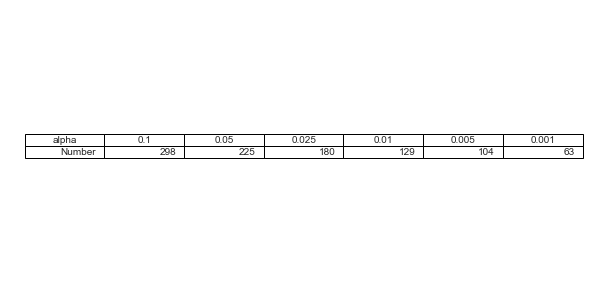

In [16]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs =plt.subplots(figsize=(10,5))
collabel=("alpha","0.1", "0.05", "0.025","0.01","0.005","0.001")
axs.axis('off')
the_table = axs.table(cellText=[["Number",298,225,180,129,104,63]],colLabels=collabel,loc='center')
plt.show()

Bayseioan 
Guassian modeling
KMean Clustering
6
GMN and Kmean



## Task 2

In [17]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from scipy import stats
import random
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

import seaborn as sns
# %matplotlib notebook
sns.set_style('whitegrid')

rpkmThreshold = 32
numBaselineClustGMM = 2
numMetforminClustGMM = 3

### 1. Extract your RPKM matrix from each dataset. This is simply the dataframe without the first few columns that contain metadata.

In [18]:
pf = pd.read_csv("task2.txt")
bbc =  baseline_csv.iloc[:, 5:]
mmc = metformin_csv.iloc[:,5:]

### 2.Find the transpose of each matrix. This will be the input to your clustering algorithms.

In [19]:
# transpose
bc = bbc.transpose()
mc = mmc.transpose()

### 3. For each transposed matrix:
#### 1. Apply the Gaussian Mixture Model (GMM) clustering algorithm.
Since your input is the transposed matrix, you will be clustering by cells.
#### 2. Use N=2 clusters for the baseline matrix and N=3 clusters for the metformin matrix.
#### 3. The output of your clustering algorithm is stored in the ‘means_’ attribute.
REPORT What do these means represent?

REPORT How many cells do you have in each of the 5 clusters?


In [20]:
# rpkmThreshold = 32
from collections import Counter

numBaselineClustGMM = 2
numMetforminClustGMM = 3
# Use N=2 clusters
gmm_b = GaussianMixture(n_components=numBaselineClustGMM, random_state=0).fit(bc)
gmm_pred_b = gmm_b.predict(bc)
centers_b = gmm_b.means_

numMetforminClustGMM = 3
# Use N=3 clusters
gmm_m = GaussianMixture(n_components=numMetforminClustGMM, random_state=0).fit(mc)
gmm_pred_m = gmm_m.predict(mc)
centers_m = gmm_m.means_
print("gmm_means is mean parameters for each mixture component")

# How many cells 
pred_b = Counter(gmm_pred_b)
pred_m = Counter(gmm_pred_m)
pred_b = sorted((pred_b.most_common()))
pred_m = sorted((pred_m.most_common()))
print("Below is how many cells are in each cluster \n", pred_b,'\n', pred_m)


gmm_means is mean parameters for each mixture component
Below is how many cells are in each cluster 
 [(0, 152), (1, 17)] 
 [(0, 161), (1, 11), (2, 5)]


### Code combined with 5 

### 4.Using the results of your clustering algorithm, create new mean baseline and mean metformin datasets

#### 1.Preserve metadata from the original dataframes
#### 2.Store the means of each cluster in additional columns
An example for the baseline dataset has been provided:

### 5. For your mean datasets,
Define clusters Bu and Bv such that |Bu|<|Bv| where |B| represents the number of cells in cluster B in the baseline dataset.
(i.e let Bu represent the smaller cluster and Bv represent the larger one)
Similarly, define clusters Mx, My and Mz such that |Mx|<|My|<|Mz| where |M| represents the number of cells in cluster M in the metformin dataset.

In [21]:
baselineCells = gmm_b
df_baseline_means = baseline_csv.iloc[:, 0:5]  # preserve metadata from first 5 columns
df_baseline_means["Bu"] = baselineCells.means_[1]
df_baseline_means["Bv"] = baselineCells.means_[0] 

metforminCells = gmm_m
df_metformin_means = metformin_csv.iloc[:, 0:5]  # preserve metadata from first 5 columns
df_metformin_means["Mx"] = metforminCells.means_[2]
df_metformin_means["My"] = metforminCells.means_[1]
df_metformin_means["Mz"] = metforminCells.means_[0]

### 6.Filter your mean metformin dataset to only include genes that meet the following condition
Mx¯¯¯¯¯¯¯<rpkmThreshold<My¯¯¯¯¯¯¯ and rpkmThreshold<Mz¯¯¯¯¯¯¯ where M¯¯¯¯¯ represents the mean of cluster M.
Call this new dataframe metformin_upMy_downMx_upMz_DF.
Hint: Cluster means are in the dataframe you created in Step 4. However, the order of your means may change with each run of the clustering algorithm. Hence, you will have to identify how to map columns “1”, “2” and “3” to Mx¯¯¯¯¯¯¯,My¯¯¯¯¯¯¯ and Mz¯¯¯¯¯¯¯. You might want to pick a fixed random state for your clustering algorithm to ensure the ordering is always the same.

In [22]:
metformin_upMy_downMx_upMz_DF = df_metformin_means.loc[(df_metformin_means['Mx'] < 32)&(32 < df_metformin_means['My'])&(32< df_metformin_means['Mz'])]
print(len(metformin_upMy_downMx_upMz_DF))
(metformin_upMy_downMx_upMz_DF).head()

338


,Chr,GeneID,Start,Stop,CodingLength,Mx,My,Mz
2,chr1,APOA1BP,156561558,156564091,1121,0.0,78.297295,34.144335
4,chr1,ARPC5,183595332,183604985,1982,0.0,191.115200,132.848917
5,chr1,ATP5F1,111991743,112004525,2101,0.0,51.638597,206.844776
6,chr1,ATP6V0B,44440602,44443972,1022,0.0,35.752469,129.101251
7,chr1,BCAS2,115110181,115124265,1301,0.0,55.242566,91.392282


### 7.Similarly, filter your mean baseline dataset to only include genes that meet the following condition
Bu¯¯¯¯¯¯<rpkmThreshold<Bv¯¯¯¯¯¯ where B¯¯¯¯ represents the mean of cluster B.
Call this new dataframe baseline_upBv_downBu_DF.
Hint: Cluster means are in the dataframe you created in Step 4. However, the order of your means may change with each run of the clustering algorithm. Hence, you will have to identify how to map columns “1”, “2” to Bu¯¯¯¯¯¯ and Bv¯¯¯¯¯¯. You might want to pick a fixed random state for your clustering algorithm to ensure the ordering is always the same.

In [23]:

baseline_upBv_downBu_DF = df_baseline_means.loc[(df_baseline_means['Bu'] < 32)&(32 < df_baseline_means['Bv'])]
print(len(baseline_upBv_downBu_DF))
(baseline_upBv_downBu_DF).head()

82


,Chr,GeneID,StartCoding,Stop,CodingLength,Bu,Bv
13,chr1,C4BPB,207262212,207273337,1195,0.00000,79.371928
36,chr1,GNG5,84964006,84972262,806,0.00000,231.590817
42,chr1,ILF2,153634514,153643479,1612,30.71635,175.105702
43,chr1,ISG15,948847,949919,666,0.00000,42.883895
55,chr1,MRPS21,150266269,150280819,939,0.00000,42.406040


### 8. Are they any genes common in your filtered datasets from steps 6 & 7?
Low expression level genes in Mx may come from Bu. These are genes with an inherently low expression level.
To account for inherently low expression levels, remove any genes that exist in baseline_upBv_downBu_DF from metformin_upMy_downMx_upMz_DF.
Call this filtered dataset newlyDownregulatedGenes_inMx_fromBu_df.

In [24]:

newlyDownregulatedGenes_inMx_fromBu_df =metformin_upMy_downMx_upMz_DF.loc[(~(metformin_upMy_downMx_upMz_DF["GeneID"]).isin(baseline_upBv_downBu_DF["GeneID"]))] # & df1.user_id.isin(df2.user_id)
print(len(newlyDownregulatedGenes_inMx_fromBu_df))
newlyDownregulatedGenes_inMx_fromBu_df.head()

303


,Chr,GeneID,Start,Stop,CodingLength,Mx,My,Mz
2,chr1,APOA1BP,156561558,156564091,1121,0.0,78.297295,34.144335
4,chr1,ARPC5,183595332,183604985,1982,0.0,191.115200,132.848917
5,chr1,ATP5F1,111991743,112004525,2101,0.0,51.638597,206.844776
6,chr1,ATP6V0B,44440602,44443972,1022,0.0,35.752469,129.101251
7,chr1,BCAS2,115110181,115124265,1301,0.0,55.242566,91.392282


### 9.Find genes that are common to newlyDownregulatedGenes_inMx_fromBu_df and your mean baseline dataset.
Further filter your mean baseline and mean metformin dataframes to include only these overlap genes.

Your dataframes will now contain only downregulated genes.

In [25]:
n = newlyDownregulatedGenes_inMx_fromBu_df
b = baseline_upBv_downBu_DF
db = df_baseline_means
dm = df_metformin_means
n = newlyDownregulatedGenes_inMx_fromBu_df

n_b_common = set(db['GeneID'].tolist()).intersection(set(n['GeneID'].tolist()))
print("%d genes common in both dataset newlyDownregulatedGenes_inMx_fromBu_df and df_baseline_means" % len(n_b_common))


221 genes common in both dataset newlyDownregulatedGenes_inMx_fromBu_df and df_baseline_means


In [26]:
down_metformin = df_metformin_means.loc[df_metformin_means["GeneID"].isin(n_b_common)]
down_baseline = df_baseline_means.loc[df_baseline_means["GeneID"].isin(n_b_common)]
len(down_metformin)                             
len(down_baseline)                             
down_metformin = down_metformin.reset_index(drop=True)
down_baseline = down_baseline.reset_index(drop=True)
down_baseline.head()

,Chr,GeneID,StartCoding,Stop,CodingLength,Bu,Bv
0,chr1,ARPC5,183595332,183604985,1982,51.795593,106.269814
1,chr1,ATP5F1,111991743,112004525,2101,71.062689,214.599276
2,chr1,ATP6V0B,44440602,44443972,1022,198.217053,163.116030
3,chr1,C1orf31,234509214,234519795,856,48.910375,88.970780
4,chr1,CDC20,43824626,43828873,1674,159.940069,93.770963


### 10.Create a new dataframe with the following data:
A column containing Bu¯¯¯¯¯¯for downregulated genes.

A column containing Bv¯¯¯¯¯¯for downregulated genes.

A column containing My¯¯¯¯¯¯¯for downregulated genes.

A column containing Mz¯¯¯¯¯¯¯for downregulated genes.
You should have 4 columns with approx 230 genes/rows/entries.

In [27]:
dataframe = pd.DataFrame()
dataframe["Bu"] = down_baseline['Bu']
dataframe["Bv"] = down_baseline['Bv']
dataframe["My"] = down_metformin['My']
dataframe["Mz"] = down_metformin['Mz']


### 11.Next, apply the log + 1 transformation to your dataframe in Step 10.
As long as your dataframe consists of all floats, this can be achieved by

  		new_df = np.log(df + 1)
	

Then, find the row means and row standard deviation for each row in your new dataframe.
Hint: Use np.mean/np.std or dataframe.apply to create new columns containing means and standard deviations

In [28]:
new_dataframe = np.log(dataframe+1)
new_dataframe["mean"] = new_dataframe.mean(axis=1)
new_dataframe["std"] = new_dataframe.std(axis=1)
new_dataframe.head()

,Bu,Bv,My,Mz,mean,std
0,3.966428,4.675347,5.258095,4.896712,4.699145,0.471407
1,4.277536,5.373421,3.963450,5.336792,4.737800,0.627349
2,5.294395,5.100574,3.604205,4.868313,4.716872,0.659871
3,3.910229,4.499485,4.939882,4.543935,4.473383,0.367567
4,5.081032,4.551463,6.026550,4.457334,5.029095,0.623028


### 12.Finally, add a column containing Mx¯¯¯¯¯¯¯ for downregulated genes to your dataframe in Step 11.
Apply the log+1 transformation to this column as well.

In [29]:
new_dataframe["Mx"] = down_metformin['Mx']
new_dataframe["Mx"] = np.log(new_dataframe["Mx"]+1)
new_dataframe.head()

,Bu,Bv,My,Mz,mean,std,Mx
0,3.966428,4.675347,5.258095,4.896712,4.699145,0.471407,0.0
1,4.277536,5.373421,3.963450,5.336792,4.737800,0.627349,0.0
2,5.294395,5.100574,3.604205,4.868313,4.716872,0.659871,0.0
3,3.910229,4.499485,4.939882,4.543935,4.473383,0.367567,0.0
4,5.081032,4.551463,6.026550,4.457334,5.029095,0.623028,0.0


### 13.Visualize each cluster by providing a box plot. You will have 5 boxes, one each for Bu,Bv,Mx,My and Mz.
One of your clusters should have zero expression.

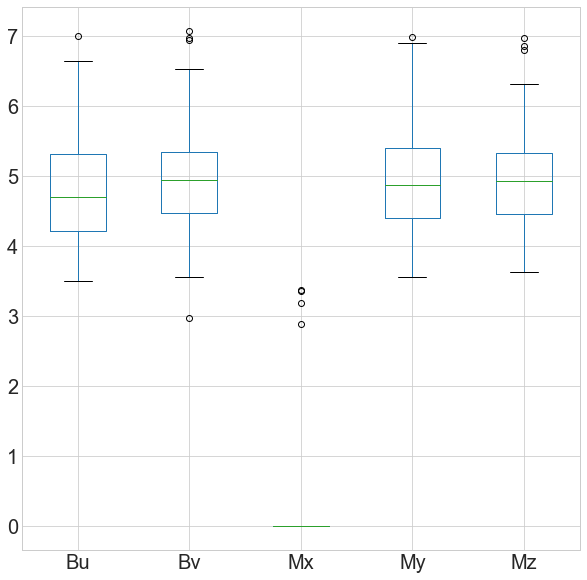

In [30]:
fig = plt.figure(figsize=(10, 10)) 
new_dataframe.boxplot(column = ['Bu', 'Bv', 'Mx', 'My', 'Mz'], fontsize = 20)
plt.show()

### 14. Repeat Tasks 1-13 with k-means clustering in Step 3.

#### 1. Perform silhouette analysis to pick the optimal value of k (number of clusters).
Provide the silhouette score or line plot for each value of k

#### 2. Are you able to replicate the results obtained with GMM clustering? For filtering with more than 2 or 3 clusters, filter the smallest cluster such that Mx<rpkmThreshold<otherMs
or Bu<rpkmThreshold<otherBs.

In [31]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [32]:
def do_kmeans(matrix, num_clusters):
    cluster = KMeans(n_clusters=num_clusters, random_state=0).fit(matrix)
    kmeans_pred = cluster.predict(matrix)
    return silhouette_score(matrix, kmeans_pred)

In [39]:
# f, ax = plt.subplots(1)
# xdata = N
# ydata = scores
# ax.plot(xdata, ydata)
# ax.set_xlim(xmin=2)
# plt.show(f)


In [37]:
f, ax = plt.subplots(1)
xdata = N
ydata = scores_m
ax.plot(xdata, ydata)
ax.set_xlim(xmin=2)
plt.show(f)


NameError: name 'N' is not defined

In [ ]:
print("From the plot and the data, we find that when both dataset has two clusters, the silhouette scores are the highest ")

### Recommand cluster size with (2,2)

In [38]:

kb =2
km =2
cluster_b = KMeans(n_clusters=kb, random_state=0).fit(bc)
kmeans_pred_b = cluster_b.predict(bc)
kmeans_centers_b = cluster_b.cluster_centers_


cluster_m = KMeans(n_clusters=km, random_state=0).fit(mc)
kmeans_pred_m = cluster_m.predict(mc)
kmeans_centers_m = cluster_m.cluster_centers_


### find each cluster counts

In [ ]:

k_pred_b = Counter(kmeans_pred_b)
k_pred_m = Counter(kmeans_pred_m)
k_pred_b = sorted((k_pred_b.most_common()))
k_pred_m = sorted((k_pred_m.most_common()))
print("Below is how many cells are in each cluster \n", k_pred_b,'\n', k_pred_m)


### Assign with Bu Bv Mx My

In [ ]:
baselineCells_k = kmeans_centers_b
df_baseline_means_k = baseline_csv.iloc[:, 0:5]  # preserve metadata from first 5 columns
df_baseline_means_k["Bu"] = baselineCells_k[1]
df_baseline_means_k["Bv"] = baselineCells_k[0] 

metforminCells_k = kmeans_centers_m
df_metformin_means_k = metformin_csv.iloc[:, 0:5]  # preserve metadata from first 5 columns
df_metformin_means_k["Mx"] = metforminCells_k[1]
df_metformin_means_k["My"] = metforminCells_k[0]

# df_baseline_means_k 
# df_metformin_means_k 

### filter data

In [ ]:
metformin_upMy_downMx_upMz_DF = df_metformin_means_k.loc[(df_metformin_means_k['Mx'] < 32)&(32 < df_metformin_means_k['My'])]
len(metformin_upMy_downMx_upMz_DF)
baseline_upBv_downBu_DF = df_baseline_means_k.loc[(df_baseline_means_k['Bu'] < 32)&(32 < df_baseline_means_k['Bv'])]

newlyDownregulatedGenes_inMx_fromBu_df =metformin_upMy_downMx_upMz_DF.loc[(~(metformin_upMy_downMx_upMz_DF["GeneID"]).isin(baseline_upBv_downBu_DF["GeneID"]))] # & df1.user_id.isin(df2.user_id)

n = newlyDownregulatedGenes_inMx_fromBu_df
db = df_baseline_means_k
dm = df_metformin_means_k

n_b_common = set(db['GeneID'].tolist()).intersection(set(n['GeneID'].tolist()))
print("%d genes common in both dataset newlyDownregulatedGenes_inMx_fromBu_df and df_baseline_means_k" % len(n_b_common))


down_metformin = df_metformin_means_k.loc[df_metformin_means_k["GeneID"].isin(n_b_common)]
down_baseline = df_baseline_means_k.loc[df_baseline_means_k["GeneID"].isin(n_b_common)]
len(down_metformin)                             
len(down_baseline)                             
down_metformin = down_metformin.reset_index(drop=True)
down_baseline = down_baseline.reset_index(drop=True)
down_baseline.head()

### New dataframe contains Bu Bv My Mx

In [ ]:
dataframe = pd.DataFrame()
dataframe["Bu"] = down_baseline['Bu']
dataframe["Bv"] = down_baseline['Bv']
dataframe["Mx"] = down_metformin['Mx']
dataframe["My"] = down_metformin['My']

new_dataframe = np.log(dataframe+1)
new_dataframe["mean"] = new_dataframe.mean(axis=1)
new_dataframe["std"] = new_dataframe.std(axis=1)
fig = plt.figure(figsize=(10, 10)) 
new_dataframe.boxplot(column = ['Bu', 'Bv', 'Mx', 'My'], fontsize = 20)
# df = pd.DataFrame(columns=['Bu', 'Bv', 'Mx', 'My', 'Mz'])
# df.plot.box()
plt.show()
# new_dataframe

Thank you!